In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import numpy as np
import torchvision
import matplotlib.pyplot as plt
from discriminator_dataset import DiscriminatorDataset
from train import train
from abstract_image_discriminator import AbstractImageDiscriminator

In [3]:
device = torch.device("cuda")

In [4]:
torch.cuda.empty_cache()
model = AbstractImageDiscriminator().to(device)
torch.cuda.empty_cache()
print("Number of parameters:", model.getNumberOfParameters())

Number of parameters: 1244545


In [5]:
dataset = DiscriminatorDataset()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [6]:
def loss(prediction, label):
    prediction = 0.999*prediction + 0.0005
    return -torch.sum(label*torch.log(prediction) + (1-label)*torch.log(1-prediction))

In [7]:
model = train(model, optimizer, loss, dataset, device, epochs=50, batchSize=16)

Epoch 1/50
----------

Progress: 100%

Loss: 0.5915 Accuracy: 0.6927 Duration: 1m 19s

Epoch 2/50
----------

Progress: 100%

Loss: 0.4964 Accuracy: 0.7810 Duration: 1m 24s

Epoch 3/50
----------

Progress: 100%

Loss: 0.4728 Accuracy: 0.7860 Duration: 1m 14s

Epoch 4/50
----------

Progress: 100%

Loss: 0.4547 Accuracy: 0.7919 Duration: 1m 16s

Epoch 5/50
----------

Progress: 100%

Loss: 0.4441 Accuracy: 0.8048 Duration: 1m 19s

Epoch 6/50
----------

Progress: 100%

Loss: 0.4262 Accuracy: 0.8174 Duration: 1m 16s

Epoch 7/50
----------

Progress: 100%

Loss: 0.4158 Accuracy: 0.8127 Duration: 1m 18s

Epoch 8/50
----------

Progress: 100%

Loss: 0.3994 Accuracy: 0.8275 Duration: 1m 19s

Epoch 9/50
----------

Progress: 100%

Loss: 0.3882 Accuracy: 0.8365 Duration: 1m 16s

Epoch 10/50
----------

Progress: 100%

Loss: 0.3715 Accuracy: 0.8382 Duration: 1m 10s

Epoch 11/50
----------

Progress: 100%

Loss: 0.3557 Accuracy: 0.8494 Duration: 1m 8s

Epoch 12/50
----------

Progress: 100%

Lo

In [8]:
torch.save(model, 'trained_models/abstract_image_discriminator.pkl')

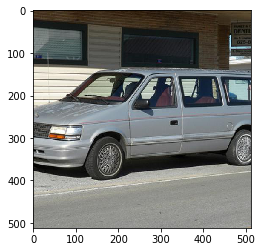

Predicted to be realistic with 99.97% probability


In [34]:
randomSample = dataset[np.random.randint(len(dataset))]
pilImage = torchvision.transforms.ToPILImage()(randomSample[0])
plt.imshow(pilImage)
plt.show()

model.eval()
prediction = model(torch.unsqueeze(randomSample[0], dim=0).to(device)).item()
model.train()
if prediction >= 0.5:
    print("Predicted to be abstract with {:.2f}% probability".format(prediction*100))
else:
    print("Predicted to be realistic with {:.2f}% probability".format((1-prediction)*100))